# 1.&nbsp;Data Understanding

## Donwload dan Membaca Dataset

Dataset yang digunakan dalam notebook adalah dataset mengenai kumpulan informasi anime yang bersumber dari [kaggle](https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset)


In [1]:
# download dataset
!kaggle datasets download -d dbdmobile/myanimelist-dataset

Dataset URL: https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset
License(s): DbCL-1.0
100% 1.80G/1.80G [00:24<00:00, 64.0MB/s]
100% 1.80G/1.80G [00:24<00:00, 78.9MB/s]


In [2]:
# unzip file
!unzip /content/myanimelist-dataset.zip

Archive:  /content/myanimelist-dataset.zip
  inflating: anime-dataset-2023.csv  
  inflating: anime-filtered.csv      
  inflating: final_animedataset.csv  
  inflating: user-filtered.csv       
  inflating: users-details-2023.csv  
  inflating: users-score-2023.csv    


In [3]:
# read the data
import pandas as pd

anime_df = pd.read_csv('/content/anime-dataset-2023.csv')
users_details_df = pd.read_csv('/content/users-details-2023.csv')
users_score_df = pd.read_csv('/content/users-score-2023.csv')

print('Jumlah anime: ', len(anime_df['anime_id'].unique()))
print('Jumlah user: ', len(users_details_df['Mal ID'].unique()))
print('Jumlah user yang memberikan penilaian: ', len(users_score_df['user_id'].unique()))
print('Jumlah penilaian yang diberikan terhadap anime: ', len(users_score_df))

Jumlah anime:  24905
Jumlah user:  731290
Jumlah user yang memberikan penilaian:  270033
Jumlah penilaian yang diberikan terhadap anime:  24325191


Dari output di atas dapat diketahui bahwa dalam daaset terdapat 24.905 judul anime, 731.290 user, 270.033 user yang telah memberikan penilaian untuk anime, dan 24.325.191 penilaian yang diberikan oleh user untuk berbagai judul anime dalam dataset.

Selanjutnya kita akan melakukan eksplorasi untuk setiap dataframe untuk mengecek kondisi data

## Anime DF

In [4]:
# menampilkan beberapa data
anime_df.head()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...


In [5]:
# menampilkan informasi umum
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

- Semua kolom dalam DataFrame ini memiliki nilai yang tidak kosong (non-null), yang berarti tidak ada nilai yang hilang.
- Beberapa kolom yang seharusnya berisi informasi numerik, seperti `Score`, `Episodes`, dan `Rank`, bertipe data object. Ini mungkin menunjukkan bahwa data tersebut perlu dibersihkan atau diubah menjadi tipe data yang sesuai.
- Sebagian besar kolom dalam DataFrame ini adalah tipe data object, yang biasanya digunakan untuk teks.

In [6]:
# menampilkan statistik untuk kolom numerik
anime_df.describe()

,anime_id,Popularity,Favorites,Members
count,24905.000000,24905.000000,24905.000000,2.490500e+04
mean,29776.709014,12265.388356,432.595222,3.710496e+04
std,17976.076290,7187.428393,4353.181647,1.568252e+05
min,1.000000,0.000000,0.000000,0.000000e+00
25%,10507.000000,6040.000000,0.000000,2.090000e+02
50%,34628.000000,12265.000000,1.000000,1.056000e+03
75%,45240.000000,18491.000000,18.000000,9.326000e+03
max,55735.000000,24723.000000,217606.000000,3.744541e+06



- Beberapa kolom menunjukkan distribusi yang sangat lebar, terutama `Favorites` dan `Members`, dengan nilai maksimum yang sangat tinggi dibandingkan dengan nilai median dan kuartil bawah.
- Kolom `Favorites` memiliki banyak nilai nol, yang menunjukkan bahwa banyak anime tidak memiliki favorit yang tercatat.
- Kolom `Members` menunjukkan variasi yang sangat besar, yang mengindikasikan adanya anime yang sangat populer dan banyak yang kurang populer.

In [7]:
# cek duplikasi data
anime_df.duplicated().sum()

0

Tidak terdapat data yang duplikat dalam dataframe `anime_df`

## Users Details DF

In [8]:
# menampilkan beberapa data
users_details_df.head()

,Mal ID,Username,Gender,Birthday,Location,Joined,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
0,1,Xinil,Male,1985-03-04T00:00:00+00:00,California,2004-11-05T00:00:00+00:00,142.3,7.37,1.0,233.0,8.0,93.0,64.0,399.0,60.0,8458.0
1,3,Aokaado,Male,NaN,"Oslo, Norway",2004-11-11T00:00:00+00:00,68.6,7.34,23.0,137.0,99.0,44.0,40.0,343.0,15.0,4072.0
2,4,Crystal,Female,NaN,"Melbourne, Australia",2004-11-13T00:00:00+00:00,212.8,6.68,16.0,636.0,303.0,0.0,45.0,1000.0,10.0,12781.0
3,9,Arcane,NaN,NaN,NaN,2004-12-05T00:00:00+00:00,30.0,7.71,5.0,54.0,4.0,3.0,0.0,66.0,0.0,1817.0
4,18,Mad,NaN,NaN,NaN,2005-01-03T00:00:00+00:00,52.0,6.27,1.0,114.0,10.0,5.0,23.0,153.0,42.0,3038.0


In [9]:
# menampilkan informasi umum
users_details_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731290 entries, 0 to 731289
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Mal ID            731290 non-null  int64  
 1   Username          731289 non-null  object 
 2   Gender            224383 non-null  object 
 3   Birthday          168068 non-null  object 
 4   Location          152805 non-null  object 
 5   Joined            731290 non-null  object 
 6   Days Watched      731282 non-null  float64
 7   Mean Score        731282 non-null  float64
 8   Watching          731282 non-null  float64
 9   Completed         731282 non-null  float64
 10  On Hold           731282 non-null  float64
 11  Dropped           731282 non-null  float64
 12  Plan to Watch     731282 non-null  float64
 13  Total Entries     731282 non-null  float64
 14  Rewatched         731282 non-null  float64
 15  Episodes Watched  731282 non-null  float64
dtypes: float64(10), int6

- Kolom seperti `Mal ID`, `Joined`, dan sebagian besar kolom numerik (`Days Watched`, `Mean Score`, dll.) memiliki nilai yang lengkap.
- Kolom seperti `Gender`, `Birthday`, dan `Location` memiliki banyak nilai kosong. Ini menunjukkan bahwa informasi ini tidak selalu tersedia untuk setiap penggun. Maka dari itu diperlukan penanganan terhadap nilai-nilai kosong tersebut sesuai dengan kebutuhan analisis.
- DataFrame ini memiliki tipe data yang beragam, termasuk integer, float, dan object. Kolom yang seharusnya berisi informasi numerik sudah menggunakan tipe data float64 yang sesuai.


In [10]:
# menampilkan statistik untuk kolom numerik
users_details_df.describe()

,Mal ID,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
count,7.312900e+05,731282.000000,731282.000000,731282.000000,731282.000000,731282.000000,731282.000000,731282.000000,731282.000000,731282.000000,7.312820e+05
mean,5.070203e+05,24.180819,3.948018,4.765714,65.953066,3.391615,4.565480,17.547893,96.230147,4.443352,1.658828e+03
std,3.640147e+05,140.105073,4.137606,20.495890,186.633286,19.296913,34.915341,90.286927,265.459220,29.693175,5.077168e+04
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2.011085e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,4.251705e+05,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.500000e+01
75%,7.753400e+05,24.800000,8.040000,4.000000,48.000000,1.000000,1.000000,5.000000,74.000000,0.000000,1.489000e+03
max,1.291097e+06,105338.600000,255.000000,4358.000000,13226.000000,5167.000000,14341.000000,21804.000000,24817.000000,13215.000000,3.376442e+07



- Kolom seperti `Days Watched`, `Mean Score`, `Watching`, `Completed`, `On Hold`, `Dropped`, `Plan to Watch`, `Rewatche`d memiliki banyak nilai nol, yang menunjukkan bahwa banyak pengguna tidak memiliki aktivitas di kategori tersebut.
- Kolom `Episodes Watched` menunjukkan variasi yang sangat besar, yang mengindikasikan adanya pengguna yang sangat aktif dan banyak yang kurang aktif.

In [11]:
# cek duplikasi data
users_details_df.duplicated().sum()

0

Tidak terdapat data yang duplikat dalam dataframe `users_details_df`

## Users Score DF

In [12]:
# menampilkan beberapa data
users_score_df.head()

,user_id,Username,anime_id,Anime Title,rating
0,1,Xinil,21,One Piece,9
1,1,Xinil,48,.hack//Sign,7
2,1,Xinil,320,A Kite,5
3,1,Xinil,49,Aa! Megami-sama!,8
4,1,Xinil,304,Aa! Megami-sama! Movie,8


In [13]:
# menampilkan informasi umum
users_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24325191 entries, 0 to 24325190
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      int64 
 1   Username     object
 2   anime_id     int64 
 3   Anime Title  object
 4   rating       int64 
dtypes: int64(3), object(2)
memory usage: 927.9+ MB


- DataFrame ini memiliki lebih dari 24 juta baris, yang menunjukkan bahwa ini adalah dataset yang sangat besar dan mungkin memerlukan sumber daya komputasi yang signifikan untuk diproses.
- Kolom-kolom yang seharusnya berisi informasi numerik (`user_id`, `anime_id`, dan `rating`) sudah menggunakan tipe data `int64`, yang sesuai. Kolom teks (`Username` dan `Anime Title`) menggunakan tipe data `object`, yang juga sesuai.

In [14]:
# menampilkan statistik untuk kolom numerik
users_score_df.describe()

,user_id,anime_id,rating
count,2.432519e+07,2.432519e+07,2.432519e+07
mean,4.403843e+05,9.754686e+03,7.622930e+00
std,3.669469e+05,1.206196e+04,1.661510e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,9.718800e+04,8.730000e+02,7.000000e+00
50%,3.879780e+05,4.726000e+03,8.000000e+00
75%,5.280430e+05,1.316100e+04,9.000000e+00
max,1.291097e+06,5.608500e+04,1.000000e+01


- Rating yang diberikan oleh pengguna berkisar antara 1 hingga 10, dengan rata-rata 7.62. Sebagian besar rating berada di atas 7, yang menunjukkan kecenderungan pengguna untuk memberikan rating yang cukup tinggi.
- ID user dan anime memiliki rentang yang luas, dengan ID user berkisar dari 1 hingga lebih dari 1.291.097 dan ID anime dari 1 hingga 56.085. Ini menunjukkan bahwa dataset mencakup sejumlah besar user dan anime.

In [15]:
# cek nilai null
users_score_df.isnull().sum()

,0
user_id,0
Username,232
anime_id,0
Anime Title,0
rating,0


Terdapat beberapa nilai kosong pada kolom `Username` yang perlu penangan lebih lanjut.

In [16]:
# cek duplikasi data
users_score_df.duplicated().sum()

0

Tidak terdapat nilai duplikat dalam dataframe `user_score_df`

# 2.&nbsp;Data Preparation

Setelah memahami data-data yang ada pada dataset, tahap selanjutnya adalah melakukan data preparation agar data-data tersebut siap digunakan untuk tahap modeling. Pada tahap ini akan dilakukan pembersihan data, seperti mengkonversi kolom ke tipe data yang seharusnya, mengatasi null-value, dan sebagainya.

## Menyesuaikan Tipe Data

In [17]:
# Mengubah tipe data kolom 'Score', 'Episodes', dan 'Rank' menjadi numerik pada dataframe 'anime_df'
anime_df['Score'] = pd.to_numeric(anime_df['Score'], errors='coerce')
anime_df['Episodes'] = pd.to_numeric(anime_df['Episodes'], errors='coerce')
anime_df['Rank'] = pd.to_numeric(anime_df['Rank'], errors='coerce')

In [18]:
# Cek kembali informasi tipe data pada 'anime_df'
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      24905 non-null  int64  
 1   Name          24905 non-null  object 
 2   English name  24905 non-null  object 
 3   Other name    24905 non-null  object 
 4   Score         15692 non-null  float64
 5   Genres        24905 non-null  object 
 6   Synopsis      24905 non-null  object 
 7   Type          24905 non-null  object 
 8   Episodes      24294 non-null  float64
 9   Aired         24905 non-null  object 
 10  Premiered     24905 non-null  object 
 11  Status        24905 non-null  object 
 12  Producers     24905 non-null  object 
 13  Licensors     24905 non-null  object 
 14  Studios       24905 non-null  object 
 15  Source        24905 non-null  object 
 16  Duration      24905 non-null  object 
 17  Rating        24905 non-null  object 
 18  Rank          20293 non-nu

In [19]:
# Cek nilai NaN pada 'anime_df
anime_df.isna().sum()

,0
anime_id,0
Name,0
English name,0
Other name,0
Score,9213
Genres,0
Synopsis,0
Type,0
Episodes,611
Aired,0


Tipe data untuk kolom `Score`, `Episodes`, dan `Rank` sudah berubah menjadi tipe data numerik. Tetapi bisa dilihat juga bahwa terdapat nilai NaN pada `errors='coerce'` yang memastikan bahwa nilai yang tidak dapat dikonversi menjadi angka akan diubah menjadi NaN, sehingga menghindari kesalahan dalam proses konversi.  

Bisa dilihat juga bawha kolom `Episodes` dan `Rank` belum bertipe data int, tetapi kita belum bisa mengubahnya karena masih ada nilai NaN pada kolomnya. Kita akan menangani ini pada tahap selanjutnya.

## Menangani nilai NaN

In [20]:
# Mengisi nilai NaN dengan 0
anime_df['Score'].fillna(0, inplace=True)
anime_df['Episodes'].fillna(0, inplace=True)
anime_df['Rank'].fillna(0, inplace=True)

# Mengonversi kolom 'Episodes' dan 'Rank' menjadi integer
anime_df['Episodes'] = anime_df['Episodes'].astype(int)
anime_df['Rank'] = anime_df['Rank'].astype(int)

In [21]:
# Cek kembali informasi tipe data pada 'anime_df'
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      24905 non-null  int64  
 1   Name          24905 non-null  object 
 2   English name  24905 non-null  object 
 3   Other name    24905 non-null  object 
 4   Score         24905 non-null  float64
 5   Genres        24905 non-null  object 
 6   Synopsis      24905 non-null  object 
 7   Type          24905 non-null  object 
 8   Episodes      24905 non-null  int64  
 9   Aired         24905 non-null  object 
 10  Premiered     24905 non-null  object 
 11  Status        24905 non-null  object 
 12  Producers     24905 non-null  object 
 13  Licensors     24905 non-null  object 
 14  Studios       24905 non-null  object 
 15  Source        24905 non-null  object 
 16  Duration      24905 non-null  object 
 17  Rating        24905 non-null  object 
 18  Rank          24905 non-nu

In [22]:
# Cek nilai NaN pada 'anime_df
anime_df.isna().sum()

,0
anime_id,0
Name,0
English name,0
Other name,0
Score,0
Genres,0
Synopsis,0
Type,0
Episodes,0
Aired,0


Dari output di atas dapat dilihat bahwa tipe data nya sudah sesuai dan sudah tidak ada nilai NaN pada setiap kolom.

## Menagani Nilai Null

Pertama kita akan menangani nilai null pada dataframe `users_details_df`, kita akan mengganti nilai null nya dengan nilai tertentu.

In [23]:
# Mengisi nilai null dengan nilai tertentu pada dataframe 'users_details_df'
users_details_df['Gender'].fillna('Unknown', inplace=True)
users_details_df['Birthday'].fillna('1900-01-01', inplace=True)
users_details_df['Location'].fillna('Unknown', inplace=True)

In [24]:
# Cek kembali informasi pada 'users_details_df'
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      24905 non-null  int64  
 1   Name          24905 non-null  object 
 2   English name  24905 non-null  object 
 3   Other name    24905 non-null  object 
 4   Score         24905 non-null  float64
 5   Genres        24905 non-null  object 
 6   Synopsis      24905 non-null  object 
 7   Type          24905 non-null  object 
 8   Episodes      24905 non-null  int64  
 9   Aired         24905 non-null  object 
 10  Premiered     24905 non-null  object 
 11  Status        24905 non-null  object 
 12  Producers     24905 non-null  object 
 13  Licensors     24905 non-null  object 
 14  Studios       24905 non-null  object 
 15  Source        24905 non-null  object 
 16  Duration      24905 non-null  object 
 17  Rating        24905 non-null  object 
 18  Rank          24905 non-nu

Dapat dilihat bahwa sudah tidak terdapat nilai null pada dataframe `users_details_df`.

Kemudian kita akan menangani nilai null pada dtaframe `users_score_df`, pada kolom `username`. Karena jumlah nilai null yang ada terhitung sedikit, kita bisa langsung menghapus baris yang memiliki nilai null.

In [25]:
# Menghapus baris yang memiliki nilai null
users_score_df.dropna(subset=['Username'], inplace=True)

In [26]:
# Cek kembali nilai null
users_score_df.isnull().sum()

,0
user_id,0
Username,0
anime_id,0
Anime Title,0
rating,0


Sudah tidak terdapat nilai null pada dataframe `users_score_df`

## Menyiapkan Data untuk Modeling

Untuk membuat model sistem rekomendasi dengan content based filtering, kita akan memanfaatkan fitur `Genres`

In [27]:
anime_id = anime_df['anime_id'].tolist()
anime_name = anime_df['Name'].tolist()
anime_genre = anime_df['Genres'].tolist()

print(len(anime_id))
print(len(anime_name))
print(len(anime_genre))

anime_new = pd.DataFrame({
      'id': anime_id,
      'name': anime_name,
      'genre': anime_genre
})

anime_new.sample(10)

24905
24905
24905


,id,name,genre
18688,45259,Xing Mao Lixian Ji: Meishi Pian,UNKNOWN
21562,49980,Sugar Apple Fairy Tale,"Adventure, Fantasy, Romance"
7453,16590,Mashin Eiyuuden Wataru: Soukaizan Eiyuu Densetsu,"Action, Adventure, Comedy, Fantasy, Sci-Fi"
23360,53327,Nanjamo no Aibou wa Nanimono nanja!? (Donna Mo...,UNKNOWN
1872,2052,Nozomi Witches,"Romance, Sports"
280,304,Aa! Megami-sama! Movie,"Comedy, Romance, Supernatural"
13126,35674,Jumbagi: Hanbandoui gongryong 3D,"Adventure, Drama"
10443,30347,Nanatsu no Taizai OVA,"Action, Adventure, Fantasy"
2219,2422,Kenritsu Chikyuu Boueigun,"Action, Adventure, Comedy, Sci-Fi"
10413,30290,Fw:Hamatora,"Comedy, Mystery"


In [28]:
anime_new = anime_new[anime_new['genre'] != 'UNKNOWN']

# 3.&nbsp;Model Development dengan Content Based Filtering

Pada tahap selanjutnya kita telah menyiapkan data yang telah siap diganap untuk tahap modeling, dimana kita menyimpan datanya ke dalam dataframe `anime_new`. Pada tahap ini kita akan membangun sistem rekomendasi sederhana berdasarkan genre dari suatu anime.

In [29]:
data = anime_new

data.head()

,id,name,genre
0,1,Cowboy Bebop,"Action, Award Winning, Sci-Fi"
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Sci-Fi"
2,6,Trigun,"Action, Adventure, Sci-Fi"
3,7,Witch Hunter Robin,"Action, Drama, Mystery, Supernatural"
4,8,Bouken Ou Beet,"Adventure, Fantasy, Supernatural"


## TF-IDF Vectorizer

Pada proyek ini kita akan menggunakan fungsi `tfdfvectorizer()` dari library sklearn

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data genre
tf.fit(data['genre'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['action', 'adventure', 'avant', 'award', 'boys', 'comedy', 'drama',
       'ecchi', 'erotica', 'fantasy', 'fi', 'garde', 'girls', 'gourmet',
       'hentai', 'horror', 'life', 'love', 'mystery', 'of', 'romance',
       'sci', 'slice', 'sports', 'supernatural', 'suspense', 'winning'],
      dtype=object)

Selanjutnya kita akan melakukan fit dan transformasi ke dalam bentuk matriks

In [31]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['genre'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(19976, 27)

Matriks yang kita miliki berukuran (19976, 27)). Nilai 19976 merupakan ukuran data dan 27 merupakan matrik genre.

In [32]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.27117604, 0.        , 0.        , ..., 0.        , 0.        ,
         0.60152313],
        [0.51585726, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.45012708, 0.48847004, 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.56927799, 0.61777053, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.41367741, 0.4489155 , 0.        , ..., 0.        , 0.        ,
         0.        ]])

Selanjutnya, mari kita lihat matriks tf-idf untuk beberapa nama anime dan genre

In [33]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan genre
# Baris diisi dengan nama anime

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.name
).sample(22, axis=1).sample(10, axis=0)

,award,hentai,ecchi,gourmet,life,erotica,adventure,slice,sci,fantasy,...,of,drama,supernatural,boys,sports,action,avant,garde,suspense,girls
name,,,,,,,,,,,,,,,,,,,,,
"Yuusha, Yamemasu Puchi Hiroma",0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.753605,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Rescue Q-tai no Katsuyaku,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
King Kong: 001/7 Tom Thumb,0.0,0.0,0.000000,0.0,0.000000,0.0,0.547021,0.000000,0.591933,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Chokkan × Algorhythm♪ 3rd Season,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Fault!! Service: Aratanaru Rival,0.0,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Tsugumomo,0.0,0.0,0.661033,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.562368,0.0,0.0,0.382031,0.0,0.0,0.0,0.0
Teleclub no Himitsu,0.0,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Dareka no Manazashi,0.0,0.0,0.000000,0.0,0.517091,0.0,0.000000,0.517091,0.000000,0.000000,...,0.517091,0.444805,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Nanatsu no Taizai: Tsumi no Kokuhaku Dennou Grimoire!,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


Output yang ditampilkan adalah sebagian dari matriks TF-IDF yang dipilih secara acak. Mari kita lihat lebih detail:

- **Baris dan Kolom**: Setiap baris mewakili nama anime, dan setiap kolom mewakili genre.
- **Nilai Matriks**: Nilai pada setiap sel dalam matriks (misalnya, 0.444805) adalah skor TF-IDF dari genre tertentu untuk anime tertentu. Skor ini menunjukkan seberapa mewakili genre tersebut untuk anime tersebut dalam konteks seluruh dataset.
  - **0**: Genre tidak ada atau tidak mewakili anime tersebut.
  - **>0**: Genre ada dan mewakili anime tersebut, dengan nilai yang lebih tinggi menunjukkan representasi yang lebih besar.
- **Contoh Interpretasi**:
  - **`Rescue Q-tai no Katsuyaku`**: Memiliki skor TF-IDF 1.000000 untuk genre `drama`, menunjukkan bahwa genre `drama` sangat mewakili anime ini.
  - **`Dareka no Manazashi`**: Memiliki skor TF-IDF 0.444805 untuk genre `drama` dan 0.517091 untuk genre `life`, menunjukkan bahwa kedua genre ini mewakili anime ini, dengan genre `life` lebih mewakili daripada `drama`.
- **Kesimpulan**: Output ini menunjukkan bagaimana matriks TF-IDF dapat digunakan untuk melihat seberapa mewakili setiap genre untuk setiap anime dalam dataset. Matriks ini merupakan dasar untuk berbagai analisis teks dan rekomendasi, termasuk menghitung kemiripan antara anime berdasarkan genre mereka.

## Cosine Similarity

In [34]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.52568037, 0.45869853, ..., 0.        , 0.15437455,
        0.42155477],
       [0.52568037, 1.        , 0.87258067, ..., 0.        , 0.29366618,
        0.80192223],
       [0.45869853, 0.87258067, 1.        , ..., 0.        , 0.55800983,
        0.91902361],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.18837829,
        0.13688891],
       [0.15437455, 0.29366618, 0.55800983, ..., 0.18837829, 1.        ,
        0.72667031],
       [0.42155477, 0.80192223, 0.91902361, ..., 0.13688891, 0.72667031,
        1.        ]])

Pada tahap ini, kita menghitung cosine similarity dari dataframe tfidf_matrix yang telah kita peroleh pada langkah sebelumnya. Dengan satu baris kode untuk memanggil fungsi cosine similarity dari library sklearn, kita dapat menghitung kesamaan (similarity) antar anime dengan mudah.

In [35]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama anime
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['name'], columns=data['name'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap anime
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (19976, 19976)


name,Cardcaptor Sakura: Clear Card-hen Prologue - Sakura to Futatsu no Kuma,Granblue Fantasy The Animation Season 2,Kuroshitsuji Picture Drama,Shi Yi Chang An: Mingyue Jishi You,Chiisana Kyojin Microman
name,,,,,
Akashic Re:cords,0.579568,0.659832,0.0,0.000000,0.000000
Upotte!! Miatte Waratte,0.000000,0.000000,0.0,0.000000,0.151728
Congming Chongwu Dan,0.579568,0.659832,0.0,0.000000,0.000000
Sailor Fuku Shinryou Tsumaka,0.000000,0.000000,0.0,0.000000,0.000000
Fu Guo Xi Mei Kexue Shijie Tanxian Ji,0.000000,0.751413,0.0,0.000000,0.457498
RahXephon Specials,0.346663,0.000000,0.0,0.425393,0.502976
Shan Buzai Gao,0.436766,0.497253,0.0,0.000000,0.230337
I'm Stuck!!: Life of the Dead,0.000000,0.000000,0.0,0.000000,0.140870
Vandread: Taidou-hen,0.000000,0.277728,0.0,0.000000,0.807888


Output yang ditampilkan adalah sebagian dari matriks Cosine Similarity yang dipilih secara acak. Mari kita lihat lebih detail:
- **Baris dan Kolom**: Setiap baris dan kolom mewakili nama anime.
- **Nilai Matriks**: Nilai pada setiap sel dalam matriks (misalnya, 0.214691) adalah skor kemiripan kosinus antara dua anime. Skor ini berkisar antara 0 hingga 1:
  - **0**: Tidak ada kemiripan.
  - **1**: Kemiripan sempurna.
- **Contoh Interpretasi**:
  - **`Vandread: Taidou-hen	` vs `Granblue Fantasy The Animation Season 2`**: Skor kemiripan adalah 0.277728	, yang menunjukkan ada sedikit kemiripan antara kedua anime ini.
  - **`Vandread: Taidou-hen	` vs `Chiisana Kyojin Microman`**: Skor kemiripan adalah 0.807888	, yang menunjukkan kemiripan yang cukup tinggi antara kedua anime ini.
- **Kesimpulannya**: output ini menunjukkan bagaimana matriks Cosine Similarity dapat digunakan untuk melihat seberapa mirip satu anime dengan anime lainnya berdasarkan fitur yang telah digabungkan (dalam hal ini, `Genres`). Matriks ini merupakan dasar untuk membuat rekomendasi anime yang mirip dengan anime tertentu yang dipilih pengguna.

## Mendapatkan Rekomendasi

Di sini, kita membuat fungsi anime_recommendations dengan beberapa parameter sebagai berikut:

- anime_name : Nama anime (index kemiripan dataframe).
- similarity_data : Dataframe mengenai similarity yang telah kita definisikan sebelumnya.
- Items : Nama dan fitur yang digunakan untuk mendefinisikan kemiripan, dalam hal ini adalah `name` dan `genre`.
- k : Banyak rekomendasi yang ingin diberikan.

In [42]:
def anime_recommendations(anime_name, similarity_data=cosine_sim_df, items=data[['name', 'genre']], k=5):
    """
    Rekomendasi Resto berdasarkan kemiripan dataframe

    Parameter:
    ---
    anime_name : tipe data string (str)
                Nama Anime (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan anime sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,anime_name].to_numpy()
    if len(index) <= k:
        print(f"Warning: Less than {k} similar anime found for {anime_name}. Skipping evaluation.")
        return None # Return None if there are not enough similar anime

    index = index.argpartition(range(-1, -k, -1))


    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop name agar nama anime yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(anime_name, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [43]:
# Mengcek genre dari anime 'Seishun Buta Yarou wa Bunny Girl Senpai no Yume wo Minai'
data[data.name.eq('Seishun Buta Yarou wa Bunny Girl Senpai no Yume wo Minai')]

,id,name,genre
14179,37450,Seishun Buta Yarou wa Bunny Girl Senpai no Yum...,"Drama, Romance, Supernatural"


In [44]:
# Mendapatkan rekomendasi anime yang mirip dengan 'Seishun Buta Yarou wa Bunny Girl Senpai no Yume wo Minai'
anime_recommendations('Seishun Buta Yarou wa Bunny Girl Senpai no Yume wo Minai')

,name,genre
0,Air Movie,"Drama, Romance, Supernatural"
1,Wind: A Breath of Heart OVA,"Drama, Romance, Supernatural"
2,Kokoro Connect: Michi Random,"Drama, Romance, Supernatural"
3,Wind: A Breath of Heart (TV),"Drama, Romance, Supernatural"
4,Clannad,"Drama, Romance, Supernatural"


Dari output tersebut, kita mendapatkan rekomendasi 5 anime yang memiliki genre yang sama dengan anime `Seishun Buta Yarou wa Bunny Girl Senpai no Yume wo Minai`.

Kemudian kita bisa mencoba nmelakukan evaluasi model menggunakan metrik `precision`, `recall`, dan `f1-score`.

In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Fungsi untuk menghitung precision, recall, dan F1 score
def evaluate_recommendations(data, k=5, num_samples=10):
    y_true = []
    y_pred = []

    # Pilih sampel secara acak dari dataset
    sample_data = data.sample(n=num_samples, random_state=42)

    for anime_name in sample_data['name']:
        # Dapatkan rekomendasi untuk anime dalam data
        recommendations = anime_recommendations(anime_name, k=k)
        # Menangani ketika terdapat kurang dari k rekomendasi
        if recommendations is None:
            continue
        recommendations = recommendations['name'].tolist()

        # Tentukan anime yang relevan (ground truth)
        relevant_anime = data[data['genre'] == data[data['name'] == anime_name]['genre'].values[0]]['name'].tolist()
        relevant_anime.remove(anime_name)  # Hapus anime yang sedang diuji dari daftar relevan

        # Buat label biner untuk menghitung metrik evaluasi
        y_true.extend([1 if anime in relevant_anime else 0 for anime in recommendations])
        y_pred.extend([1] * len(recommendations))

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return precision, recall, f1

# Evaluasi sistem rekomendasi pada 5000 sampel data
precision, recall, f1 = evaluate_recommendations(data, k=5, num_samples=5000)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Precision: 0.9502
Recall: 1.0000
F1 Score: 0.9745


Dari hasil evaluasi 5000 sample, didapatkan hasil sebagai berikut:

- Nilai precision yang tinggi (0.9502) menunjukkan bahwa sistem rekomendasi sangat akurat dalam memberikan rekomendasi yang relevan. Ini berarti bahwa sebagian besar rekomendasi yang diberikan oleh sistem adalah benar-benar relevan dengan genre anime yang sedang diuji.
- Nilai recall yang sempurna (1.0000) menunjukkan bahwa sistem rekomendasi tidak melewatkan satu pun item yang relevan. Semua anime yang relevan dengan anime yang sedang diuji berhasil direkomendasikan oleh sistem.
- F1 Score yang tinggi (0.9745) adalah indikasi bahwa sistem rekomendasi memiliki kinerja yang sangat baik secara keseluruhan. Ini menunjukkan bahwa sistem tidak hanya akurat dalam memberikan rekomendasi yang relevan tetapi juga sangat efektif dalam menemukan semua item yang relevan.

Output ini menunjukkan bahwa sistem rekomendasi yang sedang diuji memiliki kinerja yang sangat baik dalam hal precision, recall, dan F1 score. Sistem ini sangat akurat dalam memberikan rekomendasi yang relevan (precision tinggi) dan juga sangat efektif dalam menemukan semua item yang relevan (recall sempurna). Kombinasi dari precision dan recall yang tinggi menghasilkan F1 score yang juga tinggi, menunjukkan keseimbangan yang baik antara kedua metrik tersebut.

# 4.&nbsp;Model Development dengan Collaborative Filtering

## Memahami Data

Pertama, kita perlu import semua library yang dibutuhkan

In [ ]:
# Import library
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

Selanjutnya, kita perlu memahami kembali data yang ada untuk pemodelan, disni kita memakai dataframe users_score_df

In [ ]:
# Menampilkan informasi
users_score_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24324959 entries, 0 to 24325190
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      int64 
 1   Username     object
 2   anime_id     int64 
 3   Anime Title  object
 4   rating       int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ GB


Jumlah data pada datframe `users_score_df` sangat banyak (mencapai 24 juta data) dan pastinya akan membutuhkan banyak waktu dan resource selama pelatihan model. Maka dari itu kita akan mengambil 10.000 sample data saja untuk mengifisienkan waktu dan resource selama pelatihan.

In [ ]:
# Mengambil sampel 10.000 baris secara acak
df_sampled = users_score_df.sample(n=10000, random_state=42)
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 6145869 to 10563952
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      10000 non-null  int64 
 1   Username     10000 non-null  object
 2   anime_id     10000 non-null  int64 
 3   Anime Title  10000 non-null  object
 4   rating       10000 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 468.8+ KB


In [ ]:
df = df_sampled

In [ ]:
# Mengubah user_id menjadi list tanpa nilai yang sama
user_ids = df['user_id'].unique().tolist()
print('list user_id: ', user_ids)

# Melakukan encoding user_id
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded user_id : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke user_id
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke user_id: ', user_encoded_to_user)

list user_id:  [98545, 53331, 554857, 491702, 25024, 311413, 1223997, 6442, 904001, 1115987, 98775, 9212, 14267, 479870, 385165, 1064215, 1075623, 68754, 505845, 310262, 101948, 500986, 446211, 358058, 473958, 415053, 67966, 356747, 347460, 450033, 108855, 1077595, 483547, 3292, 389674, 1118295, 107901, 516813, 443212, 483191, 309842, 14778, 1233749, 94764, 438674, 487036, 342168, 410398, 315031, 320629, 423820, 330695, 1136691, 70071, 1244235, 495729, 484208, 25741, 461558, 359262, 304704, 1219269, 1210777, 416272, 403443, 9595, 1235829, 324146, 530931, 19825, 1127197, 118806, 89915, 1059699, 376437, 475800, 73388, 34208, 40245, 1233903, 530453, 438057, 53700, 368550, 113817, 497453, 340204, 442998, 1087367, 471697, 307764, 292605, 1219405, 691963, 523899, 34999, 23118, 322483, 45026, 737213, 30509, 568137, 1056815, 1086457, 323696, 6736, 1134167, 337959, 100622, 26836, 27869, 405564, 33526, 12212, 83561, 80202, 355705, 119505, 72295, 1129615, 1199315, 319882, 397035, 1093187, 91392, 

In [ ]:
# Mengubah anime_id menjadi list tanpa nilai yang sama
anime_ids = df['anime_id'].unique().tolist()

# Melakukan proses encoding anime_id
anime_to_anime_encoded = {x: i for i, x in enumerate(anime_ids)}

# Melakukan proses encoding angka ke anime_id
anime_encoded_to_anime = {i: x for i, x in enumerate(anime_ids)}

In [ ]:
# Mapping user_id ke dataframe user
df['user'] = df['user_id'].map(user_to_user_encoded)

# Mapping anime_id ke dataframe anime
df['anime'] = df['anime_id'].map(anime_to_anime_encoded)

In [ ]:
# Mendapatkan jumlah user
num_users = len(df.user.unique())

# Mendapatkan jumlah anime
num_anime = len(df.anime.unique())

# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df['rating'])

# Nilai maksimal rating
max_rating = max(df['rating'])

print('Number of User: {}, Number of Anime: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_anime, min_rating, max_rating
))

Number of User: 9451, Number of Anime: 3156, Min Rating: 1.0, Max Rating: 10.0


Sampai tahap ini kita telah memahami data rating yang kita miliki, serta mengecek beberapa hal seperti jumlah user, jumlah anime, dan mengubah nilai rating menjadi float.

## Membagi Data untuk Training dan Validasi

Selanjutnya kita akan membagi data menjadi data training dan validasi. Tetapi sebelum itu, kita perlu mengacak datanya agar distribusinya menjadi random.

In [ ]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,user_id,Username,anime_id,Anime Title,rating,user,anime
17257943,500860,Ranmabaka,48942,Kuang Shen Mo Zun,5.0,717,2531
20519831,958953,rainbowstoo,6880,Deadman Wonderland,5.0,4563,396
4674416,71707,AsaNoHikari,3940,Oshiete Re: Maid,7.0,1710,1138
24321632,1290935,YUIGAHARA,356,Fate/stay night,10.0,4615,26
9240152,327859,Matiasu,3702,Detroit Metal City,8.0,4403,782
...,...,...,...,...,...,...,...
18324458,531285,Retridemption,18153,Kyoukai no Kanata,8.0,5549,365
14603883,444066,1412Bunny,210,Ranma ½,8.0,5041,16
21278007,1086507,Okashi_dream,339,Serial Experiments Lain,2.0,5227,737
11161746,367147,gorobei,245,Great Teacher Onizuka,9.0,855,272


Selanjutnya membagi data menjadi set pelatihan dan validasi dengan rasio 80:20, tetapi sebelum itu kita perlu memetakan data pengguna dan anime ke dalam satu variable terlebih dahulu. Selain itu, kita juga perlu mengubah skala rating menjadi 0 hingga 1 untuk mempermudah proses pelatihan

In [ ]:
# Membuat variabel x untuk mencocokkan data user dan anime menjadi satu value
x = df[['user', 'anime']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 717 2531]
 [4563  396]
 [1710 1138]
 ...
 [5227  737]
 [ 855  272]
 [6972 2736]] [0.44444444 0.44444444 0.66666667 ... 0.11111111 0.88888889 0.77777778]


## Proses Training

Pada tahap ini, model menghitung skor kecocokan antara pengguna dan anime menggunakan teknik embedding. Pertama, kita melakukan embedding pada data pengguna dan anime. Kemudian, operasi perkalian dot product dilakukan antara embedding pengguna dan anime. Selain itu, kita juga dapat menambahkan bias untuk setiap pengguna dan anime. Skor kecocokan diatur dalam skala [0,1] menggunakan fungsi aktivasi sigmoid. Di sini, kita akan membuat kelas RecommenderNet dengan menggunakan kelas Model dari Keras.

In [ ]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_anime, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_anime = num_anime
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.anime_embedding = layers.Embedding( # layer embeddings anime
        num_anime,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.anime_bias = layers.Embedding(num_anime, 1) # layer embedding anime bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    anime_vector = self.anime_embedding(inputs[:, 1]) # memanggil layer embedding 3
    anime_bias = self.anime_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_anime = tf.tensordot(user_vector, anime_vector, 2)

    x = dot_user_anime + user_bias + anime_bias

    return tf.nn.sigmoid(x) # activation sigmoid

Selanjutnya, kita lakukan proses compile terhadap model

In [ ]:
num_users = df['user'].max() + 1
num_anime = df['anime'].max() + 1

model = RecommenderNet(num_users, num_anime, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Model ini menggunakan Binary Crossentropy untuk menghitung loss function, Adam (Adaptive Moment Estimation) sebagai optimizer, dan root mean squared error (RMSE) sebagai metrics evaluation.

Langkah berikutnya, mulailah proses training

In [ ]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 32,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.6920 - root_mean_squared_error: 0.2967 - val_loss: 0.6872 - val_root_mean_squared_error: 0.2893
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.6077 - root_mean_squared_error: 0.2180 - val_loss: 0.6841 - val_root_mean_squared_error: 0.2864
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.5867 - root_mean_squared_error: 0.1939 - val_loss: 0.6842 - val_root_mean_squared_error: 0.2866
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.5750 - root_mean_squared_error: 0.1829 - val_loss: 0.6825 - val_root_mean_squared_error: 0.2850
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.5767 - root_mean_squared_error: 0.1837 - val_loss: 0.6823 - val_root_mean_squared_error: 0.2849
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.5668 - root_mean_squared_error: 0.1772 - val_loss: 0.6808 - val_root_mean_squared_error: 0.2835
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━

## Visualisasi Metrik

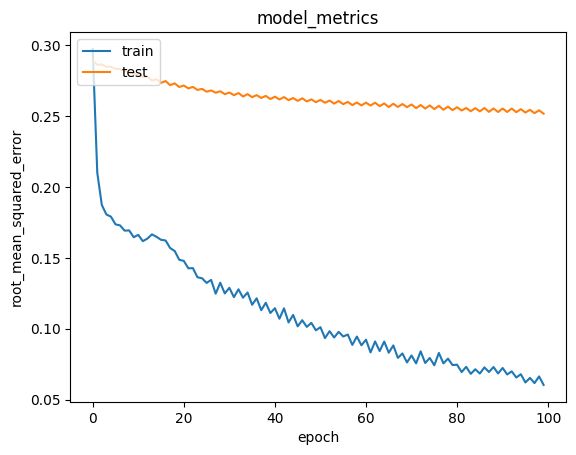

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Grafik menunjukkan bahwa model mengalami penurunan RMSE yang cukup signifikan pada data training, sementara penurunan RMSE pada data testing tidak secepat itu dan cenderung lebih lambat. Perbedaan yang semakin lebar antara RMSE pada data training dan testing mengindikasikan bahwa model mungkin mengalami overfitting. Model tampaknya sangat baik dalam menyesuaikan data training tetapi kurang mampu menggeneralisasi pola ke data testing. Ini berarti model memberikan prediksi yang sangat akurat pada data training tetapi kurang akurat pada data testing.

## Mendapatkan Rekomendasi Anime

Untuk mendapatkan rekomendasi anime, pertama-tama kita ambil sampel pengguna secara acak dan definisikan variabel `anime_not_watched`, yang merupakan daftar anime yang belum pernah ditonton oleh pengguna tersebut.

Sebelumnya, pengguna telah memberikan rating pada beberapa anime yang telah mereka tonton. Kita menggunakan rating ini untuk membuat rekomendasi anime yang mungkin sesuai dengan preferensi pengguna. Anime yang akan direkomendasikan tentunya adalah anime yang belum pernah ditonton oleh pengguna tersebut. Oleh karena itu, kita perlu membuat variabel `anime_not_watched` sebagai daftar anime yang akan direkomendasikan kepada pengguna. Variable `anime_not_watched`diperoleh dengan menggunakan operator bitwise (~) pada variabel `anime_watched_by_user`

In [ ]:
anime_df = anime_new
df = df_sampled

# Mengambil sample user
user_id = df['user_id'].sample(1).iloc[0]
anime_watched_by_user = df[df['user_id'] == user_id]

# Mendapatkan anime yang belum ditonton oleh user
anime_not_watched = anime_df[~anime_df['id'].isin(anime_watched_by_user['anime_id'].values)]['id']
anime_not_watched = list(
    set(anime_not_watched)
    .intersection(set(anime_to_anime_encoded.keys()))
)

# Mengubah anime_not_watched menjadi encoded values
anime_not_watched = [[anime_to_anime_encoded.get(x)] for x in anime_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_anime_array = np.hstack(
    ([[user_encoder]] * len(anime_not_watched), anime_not_watched)
)

Selanjutnya, untuk memperoleh rekomendasi anime, gunakan fungsi `model.predict()` dari library Keras

In [ ]:
ratings = model.predict(user_anime_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_anime_ids = [
    anime_encoded_to_anime.get(anime_not_watched[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('anime with high ratings from user')
print('----' * 8)

top_anime_user = (
    anime_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .anime_id.values
)

anime_df_rows = anime_df[anime_df['id'].isin(top_anime_user)]
for row in anime_df_rows.itertuples():
    print(row.name, ':', row.genre)

print('----' * 8)
print('Top 10 anime recommendation')
print('----' * 8)

recommended_anime = anime_df[anime_df['id'].isin(recommended_anime_ids)]
for row in recommended_anime.itertuples():
    print(row.name, ':', row.genre)

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Showing recommendations for users: 11142
anime with high ratings from user
--------------------------------
Ijiranaide, Nagatoro-san : Comedy
--------------------------------
Top 10 anime recommendation
--------------------------------
Vampire Hunter D (2000) : Action, Drama, Fantasy, Horror, Romance, Sci-Fi
Detective Conan Movie 01: The Timed Skyscraper : Adventure, Comedy, Mystery
Ginga Eiyuu Densetsu : Drama, Sci-Fi
Pokemon Movie 02: Maboroshi no Pokemon Lugia Bakutan : Adventure, Comedy, Drama, Fantasy
Fullmetal Alchemist: Brotherhood : Action, Adventure, Drama, Fantasy
Tsumiki no Ie : Award Winning, Drama
Natsume Yuujinchou Shi : Drama, Slice of Life, Supernatural
Durarara!!x2 Ten : Action, Mystery, Supernatural
ReLIFE : Drama, Romance
Banana Fish : Action, Adventure, Drama, Suspense


Kita telah berhasil memberikan rekomendasi anime kepada user berdasarkan preferensi nya. Output tersebut memberikan pengguna dengan ID 11142 daftar anime yang direkomendasikan berdasarkan rating yang mereka berikan sebelumnya. Rekomendasi ini terdiri dari anime yang belum pernah ditonton oleh pengguna dan diurutkan berdasarkan prediksi rating tertinggi dari model.